# Tweeter Sentiment Classification

In [1]:
# import appropriate modules 

import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
train = pd.read_csv('train.csv', encoding = "ISO-8859-1")

In [3]:
display(train.tail())

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
ItemID           99989 non-null int64
Sentiment        99989 non-null int64
SentimentText    99989 non-null object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
ItemID           99989 non-null int64
Sentiment        99989 non-null int64
SentimentText    99989 non-null object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB
None


In [5]:
print(train.isnull().any())

ItemID           False
Sentiment        False
SentimentText    False
dtype: bool
ItemID           False
Sentiment        False
SentimentText    False
dtype: bool


In [6]:
print(train.Sentiment.value_counts())

1    56457
0    43532
Name: Sentiment, dtype: int64
1    56457
0    43532
Name: Sentiment, dtype: int64


### Data Preparation

I will deploy BeautifulSoup to decoding HTML to general text.

In [7]:
print(train.SentimentText[99833])
print(train.SentimentText[23])

@crystalgmurphy &amp; hope you feel better  Let's try to pretend that Jon was only kidding! (might help) ;-) haha
   &lt;---Sad level is 3. I was writing a massive blog tweet on Myspace and my comp shut down. Now it's all lost *lays in fetal position*
@crystalgmurphy &amp; hope you feel better  Let's try to pretend that Jon was only kidding! (might help) ;-) haha
   &lt;---Sad level is 3. I was writing a massive blog tweet on Myspace and my comp shut down. Now it's all lost *lays in fetal position*


In [8]:
example1 = BeautifulSoup(train.SentimentText[99833], 'lxml')
print(example1.get_text())

example2 = BeautifulSoup(train.SentimentText[23], 'lxml')
print(example2.get_text())

@crystalgmurphy & hope you feel better  Let's try to pretend that Jon was only kidding! (might help) ;-) haha
<---Sad level is 3. I was writing a massive blog tweet on Myspace and my comp shut down. Now it's all lost *lays in fetal position*
@crystalgmurphy & hope you feel better  Let's try to pretend that Jon was only kidding! (might help) ;-) haha
<---Sad level is 3. I was writing a massive blog tweet on Myspace and my comp shut down. Now it's all lost *lays in fetal position*


In [9]:
print(train.SentimentText[46])

  @Spiral_galaxy @YMPtweet  it really makes me sad when i look at Muslims reality now
  @Spiral_galaxy @YMPtweet  it really makes me sad when i look at Muslims reality now


In [10]:
re.sub(r'@[A-Za-z0-9_]+','',train.SentimentText[46])

'     it really makes me sad when i look at Muslims reality now'

'     it really makes me sad when i look at Muslims reality now'

In [11]:
print(train.SentimentText[56])

  friends are leaving me 'cause of this stupid love  http://bit.ly/ZoxZC
  friends are leaving me 'cause of this stupid love  http://bit.ly/ZoxZC


In [12]:
re.sub('https?://[A-Za-z0-9./]+','',train.SentimentText[56])

"  friends are leaving me 'cause of this stupid love  "

"  friends are leaving me 'cause of this stupid love  "

In [13]:
print(train.SentimentText[42])

  *enough said*
  *enough said*


In [14]:
re.sub('[^a-zA-Z]', ' ', train.SentimentText[42])

'   enough said '

'   enough said '

### Data Preparation Summary

In [15]:
from nltk.tokenize import WordPunctTokenizer

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'www.[^ ]+'
pat4 = r'[^a-zA-Z]'


abbreviation_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not", "you're":"you are", "they're":"they are", "i'm":'i am'}
abb_pattern = re.compile(r'\b(' + '|'.join(abbreviation_dic.keys()) + r')\b')

pat = r'|'.join((pat1,pat2,pat3))

def clean_tweet(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    lower_case = re.sub(pat, ' ', souped).lower()
    abb_handled = abb_pattern.sub(lambda x: abbreviation_dic[x.group()], lower_case)  
    letters_only = re.sub(pat4, ' ', abb_handled)
    words = [x for x  in WordPunctTokenizer().tokenize(letters_only) if len(x) > 1]
    return(' '.join(words)).strip()

In [16]:
print(train.SentimentText[45])
print(clean_tweet(train.SentimentText[45]))
print(train.SentimentText[99978])
print(clean_tweet(train.SentimentText[99978]))

  @ginaaa &lt;3 GO TO THE SHOW TONIGHT
go to the show tonight
@cthulhullahoop That sucks...I like living in Coopersville, I don't need no special bags or anything 
that sucks like living in coopersville do not need no special bags or anything
  @ginaaa &lt;3 GO TO THE SHOW TONIGHT
go to the show tonight
@cthulhullahoop That sucks...I like living in Coopersville, I don't need no special bags or anything 
that sucks like living in coopersville do not need no special bags or anything


In [17]:
%%time

print('cleaning and parsing the training tweets...\n')

train_clean_tweets = []
for i in range(len(train)):
    if((i+1)%10000 == 0):
        print('%d Tweeets has been processed' % (i+1))
    train_clean_tweets.append(clean_tweet(train.SentimentText[i]))

cleaning and parsing the training tweets...

cleaning and parsing the training tweets...



C:\Users\Xin\Anaconda3\envs\keras\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\Xin\Anaconda3\envs\keras\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


10000 Tweeets has been processed
10000 Tweeets has been processed
20000 Tweeets has been processed
20000 Tweeets has been processed
30000 Tweeets has been processed
30000 Tweeets has been processed
40000 Tweeets has been processed
40000 Tweeets has been processed
50000 Tweeets has been processed
50000 Tweeets has been processed
60000 Tweeets has been processed
60000 Tweeets has been processed
70000 Tweeets has been processed
70000 Tweeets has been processed
80000 Tweeets has been processed
80000 Tweeets has been processed
90000 Tweeets has been processed
90000 Tweeets has been processed
Wall time: 1min 17s
Wall time: 1min 17s


In [19]:
display(train.tail())
display(train_clean_tweets[-5:])

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


['seems like repeating problem hope you are able to find something',
 'arrrr we both replied to each other over different tweets at the same time ll see you then duno where the hell kateyy is',
 'ya thought so',
 'yes yes am glad you had more fun with me',
 'haha yes you do']

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


['seems like repeating problem hope you are able to find something',
 'arrrr we both replied to each other over different tweets at the same time ll see you then duno where the hell kateyy is',
 'ya thought so',
 'yes yes am glad you had more fun with me',
 'haha yes you do']

In [20]:
df = pd.DataFrame(train_clean_tweets,columns=['text'])
df['target'] = train.Sentiment

In [21]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 2 columns):
text      99989 non-null object
target    99989 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 2 columns):
text      99989 non-null object
target    99989 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


None

None

# Data Visulization

In [22]:
df_train = df[:-1000]
df_test = df[-1000:]

display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98989 entries, 0 to 98988
Data columns (total 2 columns):
text      98989 non-null object
target    98989 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98989 entries, 0 to 98988
Data columns (total 2 columns):
text      98989 non-null object
target    98989 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 98989 to 99988
Data columns (total 2 columns):
text      1000 non-null object
target    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 98989 to 99988
Data columns (total 2 columns):
text      1000 non-null object
target    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


None

None

In [23]:
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(df_train.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
len(vectorizer.get_feature_names())

49923

49923

In [25]:
neg_doc_matrix = vectorizer.transform(df_train[df_train.target == 0].text)
pos_doc_matrix = vectorizer.transform(df_train[df_train.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=vectorizer.get_feature_names()).transpose()

In [26]:
display(term_freq_df.head())

term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
display(term_freq_df.sort_values(by='total', ascending=False).head(10))

,0,1
aa,12,7
aaa,9,2
aaaa,1,2
aaaaa,2,1
aaaaaa,1,1


,0,1
aa,12,7
aaa,9,2
aaaa,1,2
aaaaa,2,1
aaaaaa,1,1


,negative,positive,total
you,9794,19972,29766
the,12693,17002,29695
to,14422,14883,29305
it,10201,11876,22077
not,11541,7182,18723
and,7225,9051,16276
my,7512,6229,13741
that,6157,7419,13576
is,5713,6764,12477
for,4772,7659,12431


,negative,positive,total
you,9794,19972,29766
the,12693,17002,29695
to,14422,14883,29305
it,10201,11876,22077
not,11541,7182,18723
and,7225,9051,16276
my,7512,6229,13741
that,6157,7419,13576
is,5713,6764,12477
for,4772,7659,12431


C:\Users\Xin\Anaconda3\envs\keras\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Xin\Anaconda3\envs\keras\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


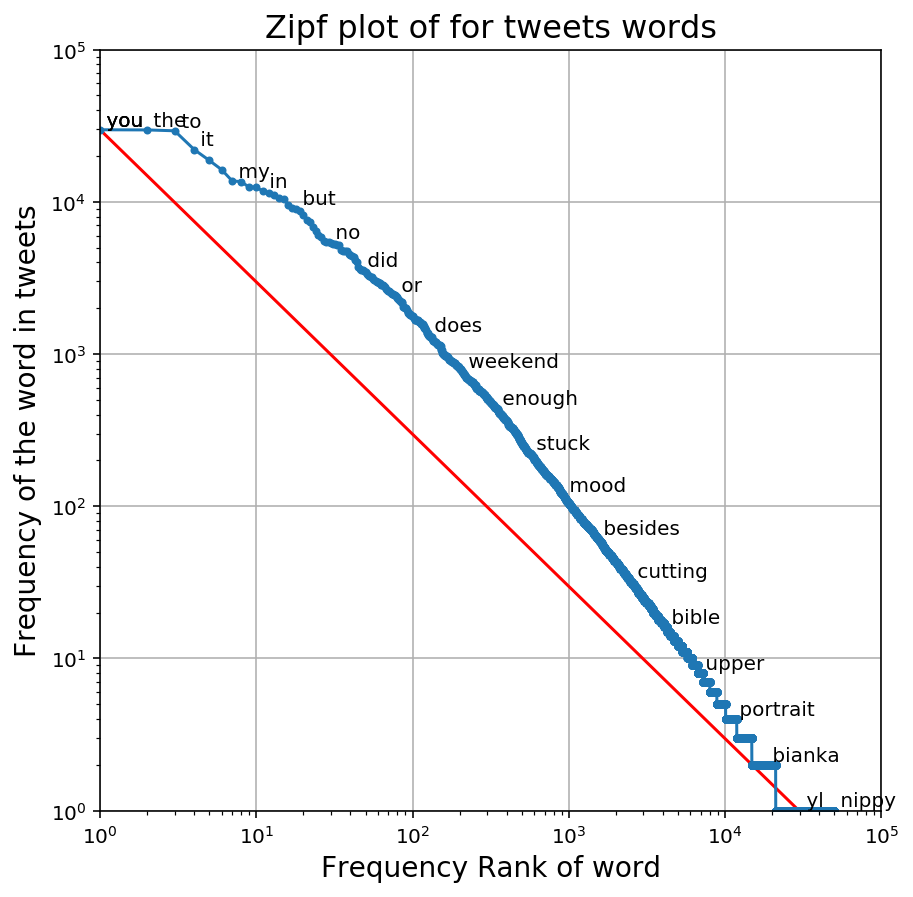

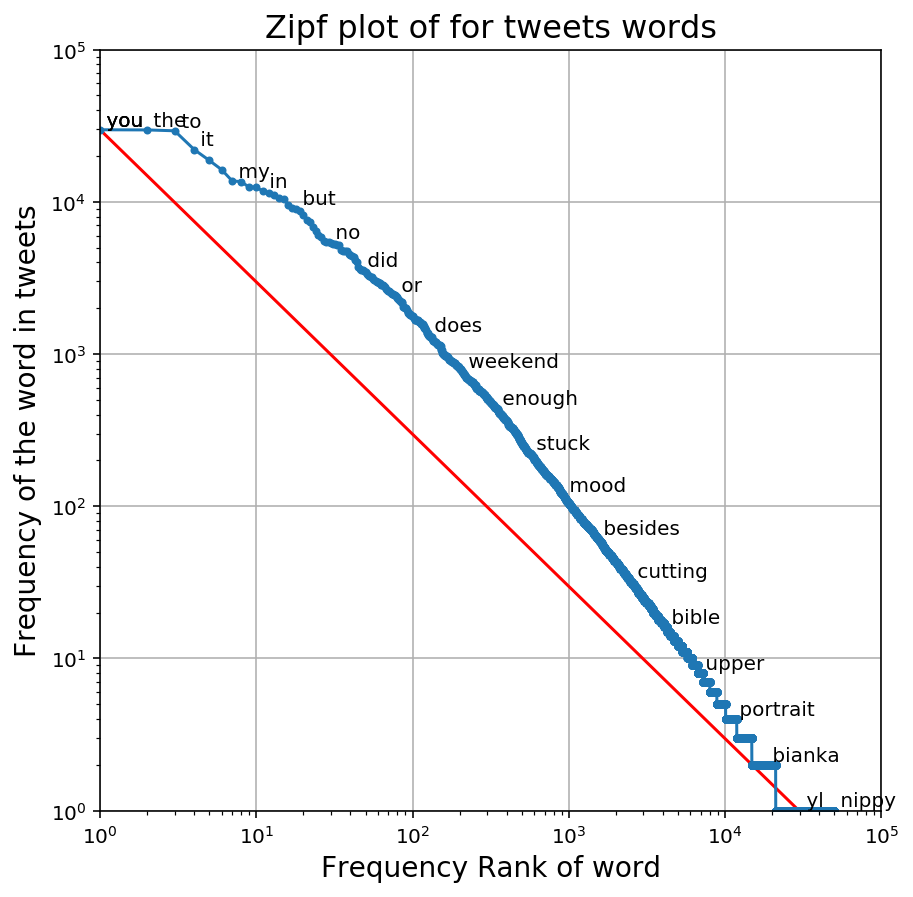

In [27]:
df = term_freq_df.sort_values(by='total', ascending=False)
counts = df.total
tokens = df.index
ranks = np.arange(1, len(counts)+1)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1,10**5)
ax.set_xlim(1,10**5)
ax.plot([1,counts[0]], [counts[0],1],'r')
ax.plot(ranks, counts, marker='.')

ax.set_title('Zipf plot of for tweets words',fontsize = 16)
ax.set_xlabel('Frequency Rank of word',fontsize = 14)
ax.set_ylabel('Frequency of the word in tweets',fontsize = 14)
ax.grid(True)

for n in list(np.logspace(-0.5, np.log10(len(counts)-2), 25).astype(int)):
    plt.text(ranks[n], counts[n], " " + tokens[n], 
         verticalalignment="bottom",
         horizontalalignment="left")

fig.show()

Now we remove the common English stop words

In [28]:
from sklearn.feature_extraction import text
display(text.ENGLISH_STOP_WORDS)

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

### Some words in the stop list seem sentimental to me, like 'cry', 'back'. So I will create the stop list of my own based on the token frequencies.

- the stop word frequency is more than 100.
- a polarization threshlod will be determined.

In [29]:
df = df[df.total >= 100]
df['pos_neg_ratio'] = np.abs(np.log(df['positive']/(df['negative']+1)+0.0001))
display(df.head())
print(len(df))

,negative,positive,total,pos_neg_ratio
you,9794,19972,29766,0.712508
the,12693,17002,29695,0.292276
to,14422,14883,29305,0.031492
it,10201,11876,22077,0.152022
not,11541,7182,18723,0.474254


,negative,positive,total,pos_neg_ratio
you,9794,19972,29766,0.712508
the,12693,17002,29695,0.292276
to,14422,14883,29305,0.031492
it,10201,11876,22077,0.152022
not,11541,7182,18723,0.474254


1039
1039


In [30]:
display(df.sort_values(by='pos_neg_ratio',ascending = False).head(10))
display(df.sort_values(by='pos_neg_ratio',ascending = False).tail(10))

,negative,positive,total,pos_neg_ratio
inaperfectworld,133,0,133,9.210340
musicmonday,7,188,195,3.157005
followfriday,35,588,623,2.793214
congratulations,7,127,134,2.764752
sad,1495,100,1595,2.703885
bummer,95,7,102,2.617068
welcome,53,727,780,2.599950
vip,14,188,202,2.528400
sadly,180,15,195,2.489241
sucks,667,66,733,2.313622


,negative,positive,total,pos_neg_ratio
too,2598,2602,5200,0.001254
mum,74,75,149,0.000100
stop,220,221,441,0.000100
mac,80,81,161,0.000100
nd,81,82,163,0.000100
save,72,73,145,0.000100
else,167,168,335,0.000100
ppl,119,120,239,0.000100
doubt,56,57,113,0.000100
web,56,57,113,0.000100


,negative,positive,total,pos_neg_ratio
inaperfectworld,133,0,133,9.210340
musicmonday,7,188,195,3.157005
followfriday,35,588,623,2.793214
congratulations,7,127,134,2.764752
sad,1495,100,1595,2.703885
bummer,95,7,102,2.617068
welcome,53,727,780,2.599950
vip,14,188,202,2.528400
sadly,180,15,195,2.489241
sucks,667,66,733,2.313622


,negative,positive,total,pos_neg_ratio
too,2598,2602,5200,0.001254
mum,74,75,149,0.000100
stop,220,221,441,0.000100
mac,80,81,161,0.000100
nd,81,82,163,0.000100
save,72,73,145,0.000100
else,167,168,335,0.000100
ppl,119,120,239,0.000100
doubt,56,57,113,0.000100
web,56,57,113,0.000100


In [31]:
display(df.head(20))

,negative,positive,total,pos_neg_ratio
you,9794,19972,29766,0.712508
the,12693,17002,29695,0.292276
to,14422,14883,29305,0.031492
it,10201,11876,22077,0.152022
not,11541,7182,18723,0.474254
and,7225,9051,16276,0.225269
my,7512,6229,13741,0.187298
that,6157,7419,13576,0.186375
is,5713,6764,12477,0.168780
for,4772,7659,12431,0.472969


,negative,positive,total,pos_neg_ratio
you,9794,19972,29766,0.712508
the,12693,17002,29695,0.292276
to,14422,14883,29305,0.031492
it,10201,11876,22077,0.152022
not,11541,7182,18723,0.474254
and,7225,9051,16276,0.225269
my,7512,6229,13741,0.187298
that,6157,7419,13576,0.186375
is,5713,6764,12477,0.168780
for,4772,7659,12431,0.472969


In [32]:
df.sort_values(by='pos_neg_ratio',ascending = False).loc['cry']

negative         210.000000
positive          40.000000
total            250.000000
pos_neg_ratio      1.662451
Name: cry, dtype: float64

negative         210.000000
positive          40.000000
total            250.000000
pos_neg_ratio      1.662451
Name: cry, dtype: float64

### To my surprise, the common non-sentimental words like 'the', 'it','you' etc have non-trivial positive to negative ratio. I am not sure whether it is because that the sample size is not big enough or it is because they really mean something in tweets. But I choose to trust the data. I'll set the ratio > 0.1 as sentimental words, and the words with ratio<0.1 as stop words.

In [33]:
display(df[df.pos_neg_ratio<0.05])

,negative,positive,total,pos_neg_ratio
to,14422,14883,29305,0.031492
have,5158,5315,10473,0.029887
so,4633,4506,9139,0.027908
get,2611,2664,5275,0.019811
too,2598,2602,5200,0.001254
now,2425,2327,4752,0.041560
this,2358,2363,4721,0.001794
out,2134,2034,4168,0.048357
he,1486,1468,2954,0.012758
its,1277,1237,2514,0.032504


,negative,positive,total,pos_neg_ratio
to,14422,14883,29305,0.031492
have,5158,5315,10473,0.029887
so,4633,4506,9139,0.027908
get,2611,2664,5275,0.019811
too,2598,2602,5200,0.001254
now,2425,2327,4752,0.041560
this,2358,2363,4721,0.001794
out,2134,2034,4168,0.048357
he,1486,1468,2954,0.012758
its,1277,1237,2514,0.032504


C:\Users\Xin\Anaconda3\envs\keras\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Xin\Anaconda3\envs\keras\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


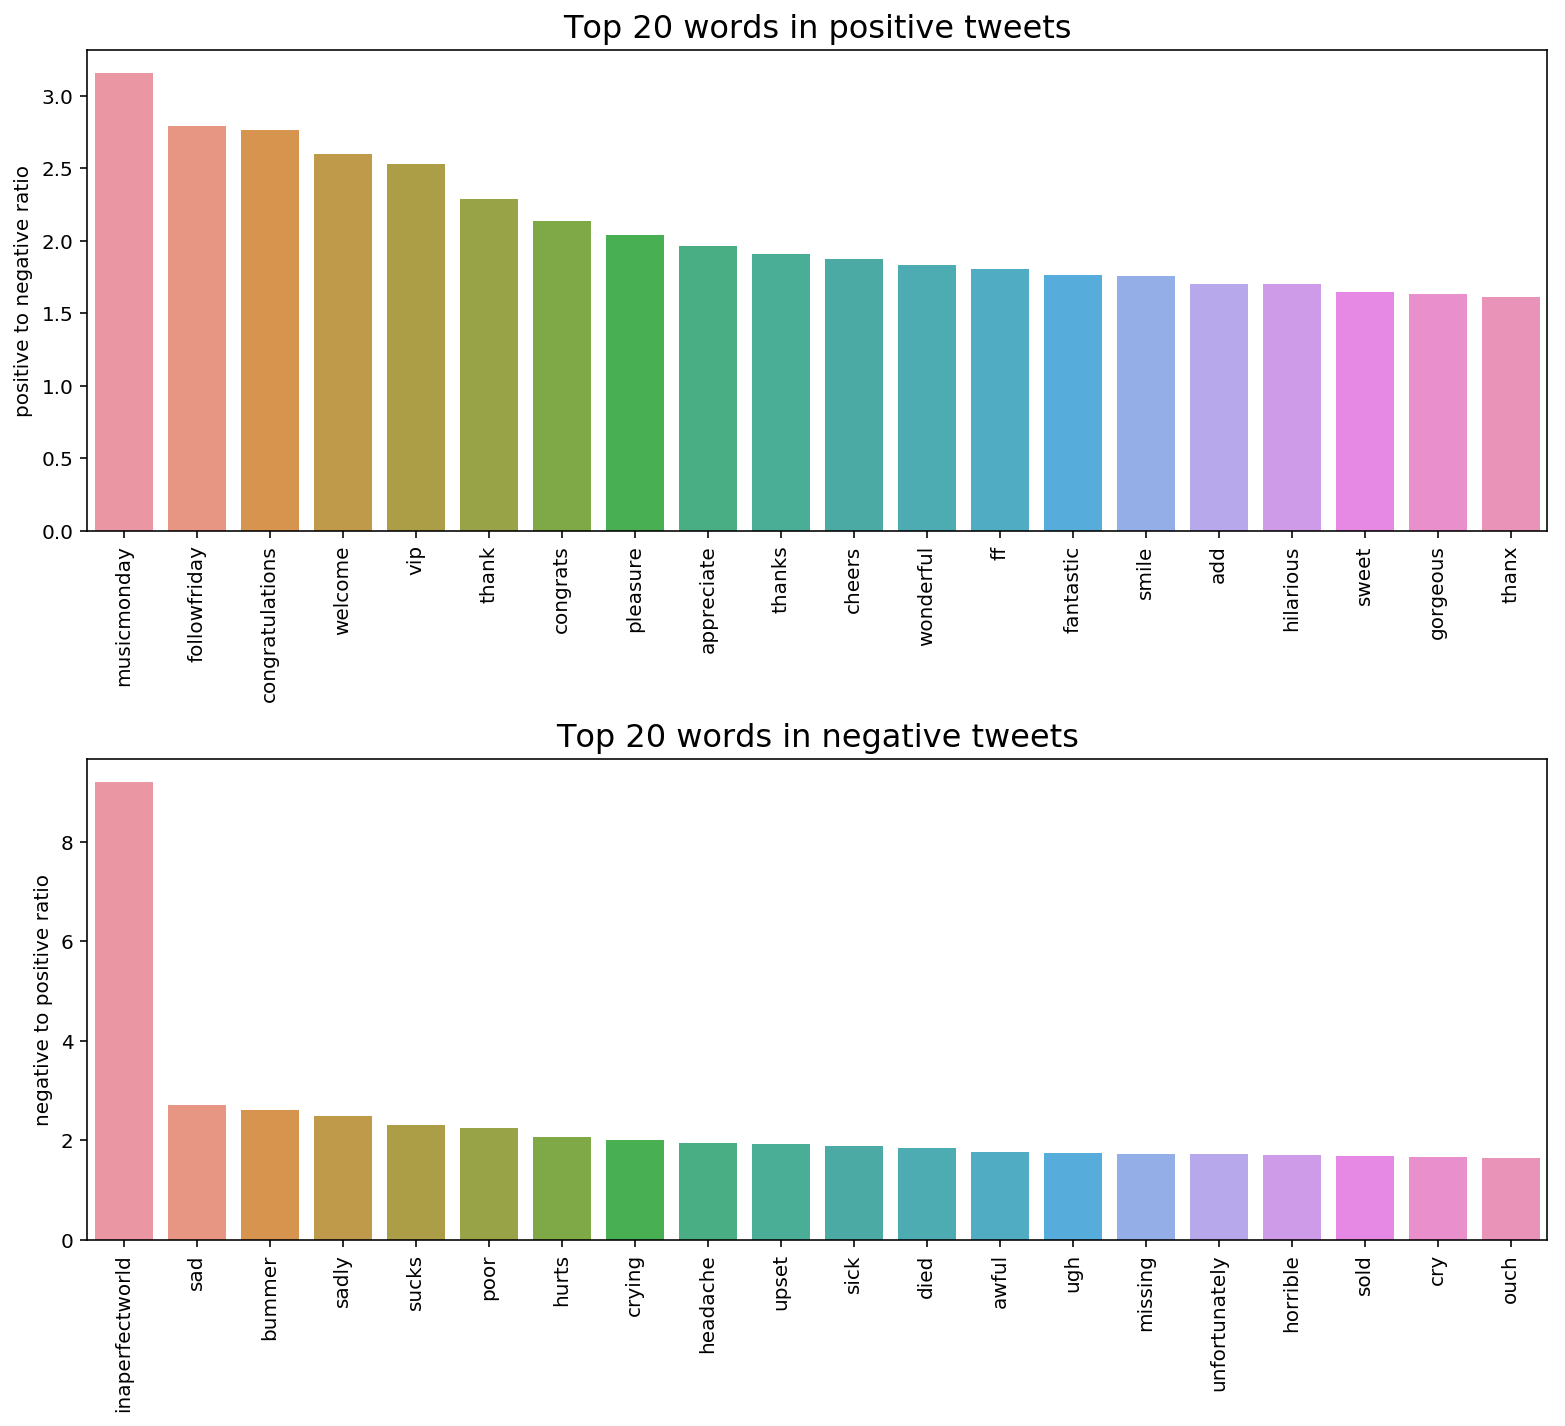

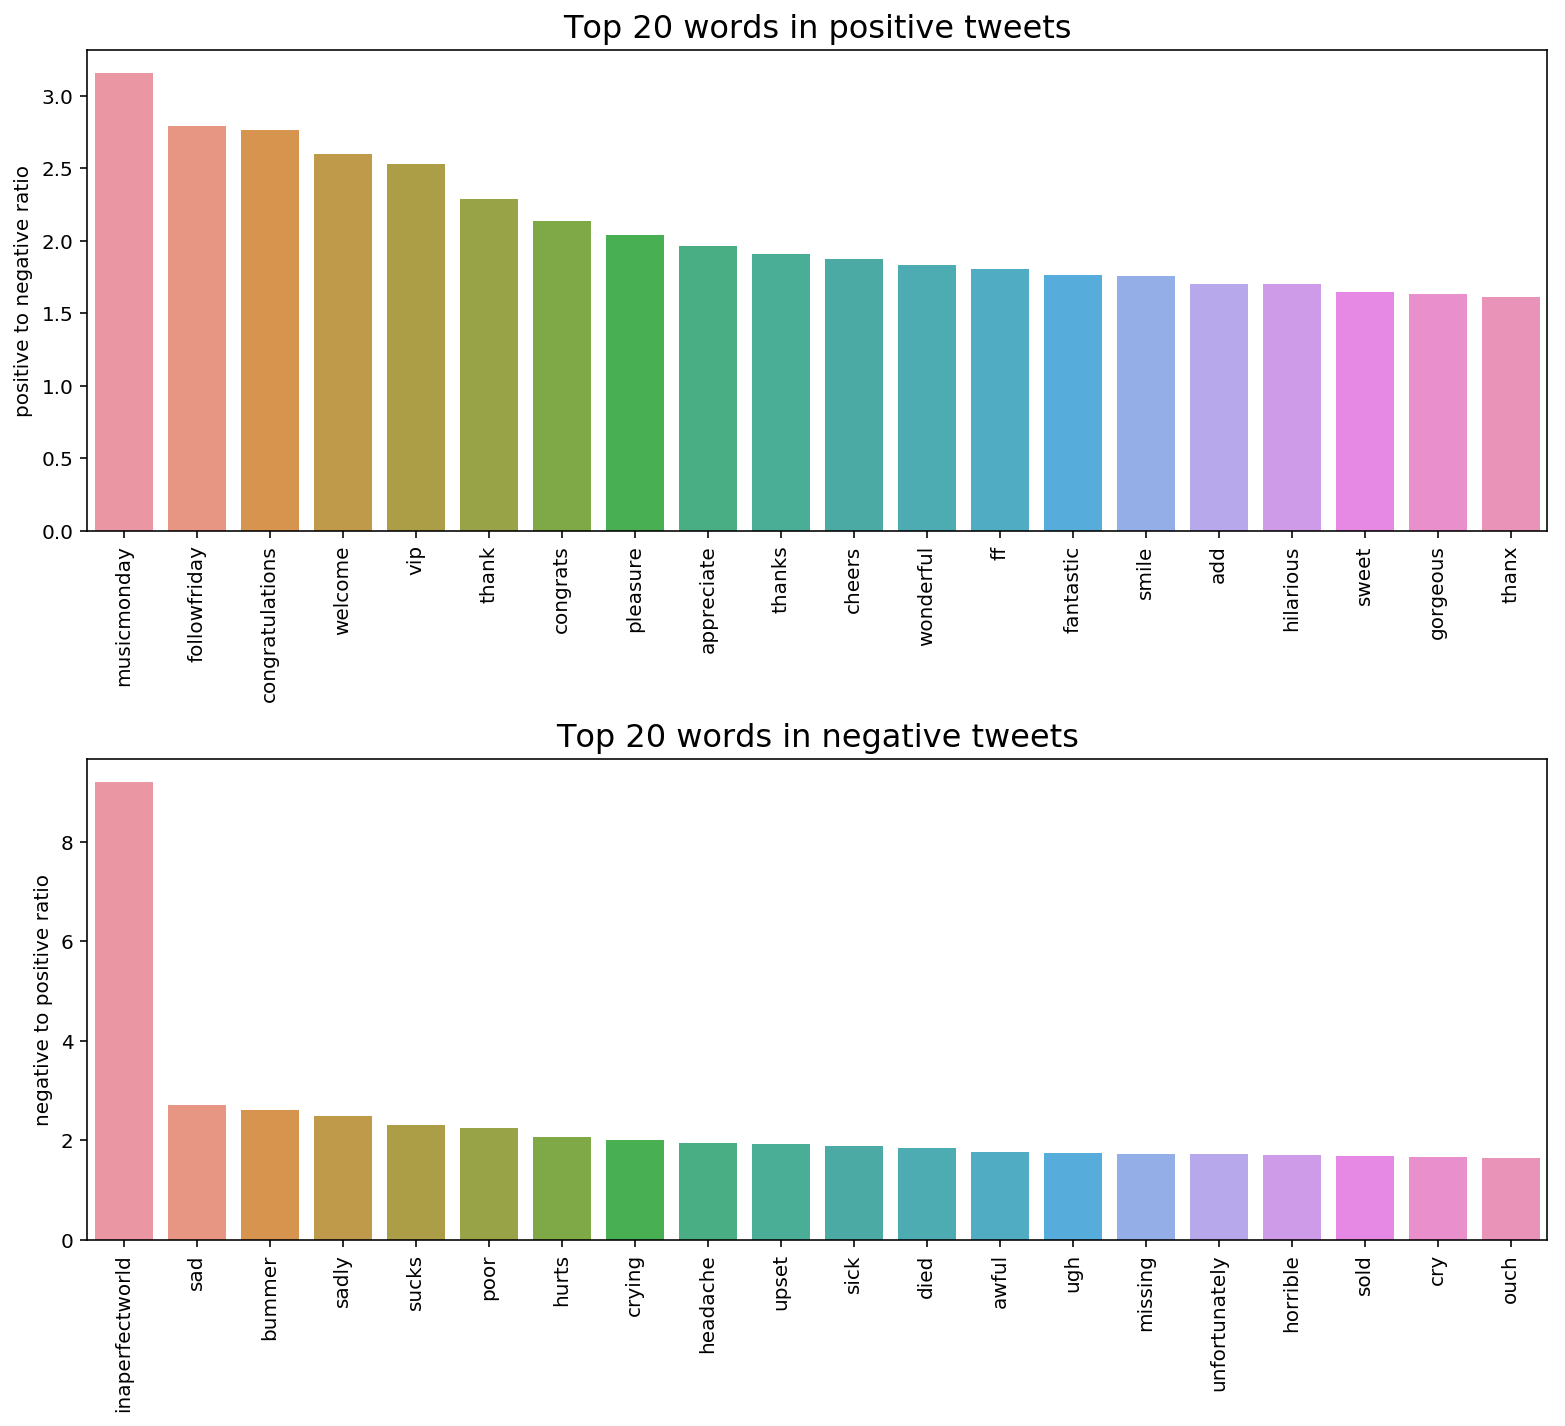

In [34]:
df['pos_neg_ratio_raw'] = np.log(df['positive']/(df['negative']+1)+0.0001)

df_sort1 = df.sort_values(by='pos_neg_ratio_raw', ascending=False)
df_sort2 = df.sort_values(by='pos_neg_ratio_raw', ascending=True)

import seaborn as sns

fig = plt.figure(figsize=(11,10))
ax1 = fig.add_subplot(211)
sns.barplot(x=df_sort1[:20].index, y='pos_neg_ratio_raw', data=df_sort1[:20],ax=ax1)
ax1.set_title('Top 20 words in positive tweets',fontsize = 16)
ax1.set_ylabel('positive to negative ratio')
plt.xticks(rotation='vertical')

ax2 = fig.add_subplot(212)
sns.barplot(x=df_sort2[:20].index, y='pos_neg_ratio', data=df_sort2[:20],ax=ax2)
ax2.set_title('Top 20 words in negative tweets',fontsize = 16)
ax2.set_ylabel('negative to positive ratio')
plt.xticks(rotation='vertical')

fig.tight_layout()
fig.show()

In [35]:
neutral_words = list(df[df.pos_neg_ratio<0.05].index)
display(neutral_words)

['to',
 'have',
 'so',
 'get',
 'too',
 'now',
 'this',
 'out',
 'he',
 'its',
 'back',
 'need',
 've',
 'she',
 'come',
 'him',
 'tomorrow',
 'thing',
 'man',
 'being',
 'said',
 'having',
 'live',
 'makes',
 'nothing',
 'anything',
 'least',
 'summer',
 'times',
 'gotta',
 'found',
 'enough',
 'stop',
 'probably',
 'early',
 'waiting',
 'through',
 'eat',
 'almost',
 'news',
 'else',
 'heart',
 'hugs',
 'gets',
 'anyone',
 'started',
 'means',
 'full',
 'ones',
 'hell',
 'took',
 'goes',
 'lunch',
 'soo',
 'reason',
 'ppl',
 'chance',
 'open',
 'move',
 'whats',
 'concert',
 'minutes',
 'iremember',
 'turn',
 'instead',
 'answer',
 'weird',
 'gave',
 'looked',
 'london',
 'chat',
 'during',
 'under',
 'nd',
 'mac',
 'worked',
 'past',
 'tuesday',
 'mum',
 'save',
 'hold',
 'na',
 'sitting',
 'finish',
 'order',
 'app',
 'living',
 'country',
 'unless',
 'giving',
 'drunk',
 'web',
 'somewhere',
 'doubt',
 'final',
 'ate',
 'caught',
 'holiday']

['to',
 'have',
 'so',
 'get',
 'too',
 'now',
 'this',
 'out',
 'he',
 'its',
 'back',
 'need',
 've',
 'she',
 'come',
 'him',
 'tomorrow',
 'thing',
 'man',
 'being',
 'said',
 'having',
 'live',
 'makes',
 'nothing',
 'anything',
 'least',
 'summer',
 'times',
 'gotta',
 'found',
 'enough',
 'stop',
 'probably',
 'early',
 'waiting',
 'through',
 'eat',
 'almost',
 'news',
 'else',
 'heart',
 'hugs',
 'gets',
 'anyone',
 'started',
 'means',
 'full',
 'ones',
 'hell',
 'took',
 'goes',
 'lunch',
 'soo',
 'reason',
 'ppl',
 'chance',
 'open',
 'move',
 'whats',
 'concert',
 'minutes',
 'iremember',
 'turn',
 'instead',
 'answer',
 'weird',
 'gave',
 'looked',
 'london',
 'chat',
 'during',
 'under',
 'nd',
 'mac',
 'worked',
 'past',
 'tuesday',
 'mum',
 'save',
 'hold',
 'na',
 'sitting',
 'finish',
 'order',
 'app',
 'living',
 'country',
 'unless',
 'giving',
 'drunk',
 'web',
 'somewhere',
 'doubt',
 'final',
 'ate',
 'caught',
 'holiday']

In [36]:
vectorizer = CountVectorizer(stop_words=neutral_words, max_features=10000)
vectorizer.fit(df_train.text)

X_train = vectorizer.transform(df_train.text)
y_train = df_train.target
X_test = vectorizer.transform(df_test.text)
y_test = df_test.target

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_pred, y_test)*100))
print("F1 Score: {0:.2f}".format(f1_score(y_pred, y_test)))
display(confusion_matrix(y_pred, y_test, labels=[1,0]))

Accuracy Score: 76.10%
F1 Score: 0.80
Accuracy Score: 76.10%
F1 Score: 0.80


array([[488, 150],
       [ 89, 273]], dtype=int64)

array([[488, 150],
       [ 89, 273]], dtype=int64)

In [38]:
vectorizer = CountVectorizer(stop_words=neutral_words, max_features=10000, ngram_range=(1,2))
vectorizer.fit(df_train.text)

X_train = vectorizer.transform(df_train.text)
y_train = df_train.target
X_test = vectorizer.transform(df_test.text)
y_test = df_test.target

log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_pred, y_test)*100))
print("F1 Score: {0:.2f}".format(f1_score(y_pred, y_test)))
display(confusion_matrix(y_pred, y_test, labels=[1,0]))

Accuracy Score: 76.30%
F1 Score: 0.80


array([[487, 147],
       [ 90, 276]], dtype=int64)

Accuracy Score: 76.30%
F1 Score: 0.80


array([[487, 147],
       [ 90, 276]], dtype=int64)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

reg= SVC()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_pred, y_test)*100))
print("F1 Score: {0:.2f}".format(f1_score(y_pred, y_test)))
display(confusion_matrix(y_pred, y_test, labels=[1,0]))

Accuracy Score: 60.90%
F1 Score: 0.74


array([[550, 364],
       [ 27,  59]], dtype=int64)

Accuracy Score: 60.90%
F1 Score: 0.74


array([[550, 364],
       [ 27,  59]], dtype=int64)

In [40]:
def regressor(n,lr=LogisticRegression()):
    vectorizer = CountVectorizer(stop_words=neutral_words, max_features=n)
    vectorizer.fit(df_train.text)

    X_train = vectorizer.transform(df_train.text)
    y_train = df_train.target
    X_test = vectorizer.transform(df_test.text)
    y_test = df_test.target
    
#     log_reg= LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)

    print('max_features = ' + str(n))
    print(lr)
    print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_pred, y_test)*100))
    print("F1 Score: {0:.2f}".format(f1_score(y_pred, y_test)))
    display(confusion_matrix(y_pred, y_test, labels=[1,0]))
    print('\n')

In [41]:
regressor(1000,lr=LogisticRegression())
regressor(10000,lr=LogisticRegression())

max_features = 1000
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy Score: 75.40%
F1 Score: 0.80
max_features = 1000
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy Score: 75.40%
F1 Score: 0.80


array([[497, 166],
       [ 80, 257]], dtype=int64)

array([[497, 166],
       [ 80, 257]], dtype=int64)





max_features = 10000
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy Score: 76.10%
F1 Score: 0.80


array([[488, 150],
       [ 89, 273]], dtype=int64)

max_features = 10000
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy Score: 76.10%
F1 Score: 0.80


array([[488, 150],
       [ 89, 273]], dtype=int64)

In [43]:
from sklearn.svm import SVC
regressor(10000, lr=SVC())

max_features = 10000
max_features = 10000
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy Score: 60.40%
Accuracy Score: 60.40%
F1 Score: 0.73
F1 Score: 0.73


array([[549, 368],
       [ 28,  55]], dtype=int64)

array([[549, 368],
       [ 28,  55]], dtype=int64)